<a href="https://colab.research.google.com/github/almaraj/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Data Science Solution framework**: Sales is the dependent variable having continuous data. hence the solution is to build an appropriate regression model to predict the "Sales" column for the test set.

**Performance Model Metric:** I would prefer using RMSE as the values in Sales is big so i need to penalize large prediction errors.


In [108]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Mounting google drive in order to import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
# Importing the store data as store_data and additional store dataset as store_info
store_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7. Capstone Project-2(Sales Prediction)/Rossmann Stores Data.csv')
store_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7. Capstone Project-2(Sales Prediction)/store.csv')

In [111]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [112]:
# Let's see if the right table has imported or not.
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [113]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [114]:
# Let's see if the right table has imprted or not.
store_info.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Here we have two data frame first one is store_data which has the sales values and second one is the store_info which has all the additional information about stores.

If we observe we find that both column has "Store" column which contains a unique store id, so to get all data in a single dataframe we have to merge these two tables on that key "Store".

In [115]:
data = pd.merge(store_data, store_info, on="Store")

In [116]:
store_data.shape

(1017209, 9)

In [117]:
store_info.shape

(1115, 10)

In [118]:
data.shape

(1017209, 18)

in data frame "data" we have our final data to be processed further. Before doing all modifications let's make a copy of data so that or original data would be preserved.

In [119]:
copy_of_data = data.copy()

In [120]:
copy_of_data.shape

(1017209, 18)

Oh! Now the notebook is Loded and Locked, Hey! data are you ready to Combat ;)

#NaN value handeling

In [121]:
copy_of_data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2013-10-05,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [122]:
copy_of_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [123]:
# Get the list of columns that has missing values
missing = copy_of_data.columns[copy_of_data.isnull().any()].tolist()
# Missing data counts and percentage column wise
print('Missing Data Count')
print(copy_of_data[missing].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(copy_of_data[missing].isnull().sum().sort_values(ascending = False)/len(copy_of_data)*100,2))


Missing Data Count
PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PromoInterval                49.94
Promo2SinceYear              49.94
Promo2SinceWeek              49.94
CompetitionOpenSinceYear     31.79
CompetitionOpenSinceMonth    31.79
CompetitionDistance           0.26
dtype: float64


##first three column

In [124]:
copy_of_data['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [125]:
copy_of_data['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [126]:
copy_of_data['Promo2SinceYear'].value_counts()

2011.0    115056
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: Promo2SinceYear, dtype: int64

In [127]:
copy_of_data['Promo2SinceWeek'].value_counts()

14.0    72990
40.0    62598
31.0    39976
10.0    38828
5.0     35818
37.0    32786
1.0     32418
13.0    29820
45.0    29268
22.0    28694
18.0    27318
35.0    22814
9.0     12452
27.0     9626
36.0     9236
48.0     8294
39.0     4732
23.0     4342
44.0     2642
6.0       942
28.0      942
50.0      942
26.0      942
49.0      758
Name: Promo2SinceWeek, dtype: int64

In [128]:
copy_of_data['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

promo tells us wheather store is in pomotion or not and here the 0 count is 58031 which is same as the null values in PromoInterval , Promo2SinceYear and Promo2SinceWeek columns and that is obvious.

PromoInterval , Promo2SinceYear and Promo2SinceWeek are all missing 508031 observations. These null values are assumed to be in the same rows for each column and associated with stores that do not have promo at all. If these assumptions are correct, the nulls can be inputed with zero or None according to object type as these are stores without promo.

In [129]:
print(copy_of_data[['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']].isnull().sum())

# Assumptions check
print('--'*50)
print('Assumption Check')
print(copy_of_data[(copy_of_data['PromoInterval'].isnull())|
                 (copy_of_data['Promo2SinceYear'].isnull())|
                 (copy_of_data['Promo2SinceWeek'].isnull())]
                 [['Promo2', 'PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']])

PromoInterval      508031
Promo2SinceYear    508031
Promo2SinceWeek    508031
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
         Promo2 PromoInterval  Promo2SinceYear  Promo2SinceWeek
0             0           NaN              NaN              NaN
1             0           NaN              NaN              NaN
2             0           NaN              NaN              NaN
3             0           NaN              NaN              NaN
4             0           NaN              NaN              NaN
...         ...           ...              ...              ...
1016262       0           NaN              NaN              NaN
1016263       0           NaN              NaN              NaN
1016264       0           NaN              NaN              NaN
1016265       0           NaN              NaN              NaN
1016266       0           NaN              NaN              NaN

[508031 rows x 4 colum

In [130]:
# Function to impute missing values
def feat_impute(column, value):
    copy_of_data.loc[copy_of_data[column].isnull(),column] = value

# Impute null garage features
null_promo =['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']
for cols in null_promo:
   if copy_of_data[cols].dtype == np.object:
         feat_impute(cols, 'None')
   else:
         feat_impute(cols, 0)
        
# Garage Features After
print('--'*50)
print('Promo Features Missing After Imputation')
print(copy_of_data[['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']].isnull().sum())
print('--'*50)
# Cross check columns
print('Confirm Imputation')
for cols in null_promo:
    print(pd.crosstab(copy_of_data[cols],copy_of_data.Promo2))

----------------------------------------------------------------------------------------------------
Promo Features Missing After Imputation
PromoInterval      0
Promo2SinceYear    0
Promo2SinceWeek    0
dtype: int64
----------------------------------------------------------------------------------------------------
Confirm Imputation
Promo2                 0       1
PromoInterval                   
Feb,May,Aug,Nov        0  118596
Jan,Apr,Jul,Oct        0  293122
Mar,Jun,Sept,Dec       0   97460
None              508031       0
Promo2                0       1
Promo2SinceYear                
0.0              508031       0
2009.0                0   65270
2010.0                0   56240
2011.0                0  115056
2012.0                0   73174
2013.0                0  110464
2014.0                0   79922
2015.0                0    9052
Promo2                0      1
Promo2SinceWeek               
0.0              508031      0
1.0                   0  32418
5.0                  

## seond ast feature

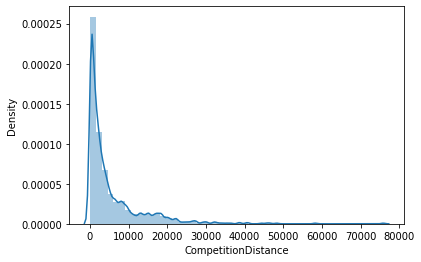

In [131]:
sns.distplot(copy_of_data.CompetitionDistance.dropna())

 Positively Skewed - So we will impute it with Median

In [132]:
copy_of_data['CompetitionDistance'] = copy_of_data['CompetitionDistance'].fillna(copy_of_data['CompetitionDistance'].median())
print('CompetitionDistance Missing After:', copy_of_data['CompetitionDistance'].isnull().sum())

CompetitionDistance Missing After: 0


## third two columns

In [133]:
copy_of_data['CompetitionOpenSinceYear'].value_counts()

2013.0    75426
2012.0    74299
2014.0    63732
2005.0    56564
2010.0    51258
2011.0    49396
2009.0    49396
2008.0    48476
2007.0    43744
2006.0    42802
2015.0    35060
2002.0    24882
2004.0    19804
2003.0    16794
2001.0    14704
2000.0     9236
1999.0     7352
1990.0     4710
1994.0     1884
1995.0     1700
1998.0      942
1961.0      942
1900.0      758
Name: CompetitionOpenSinceYear, dtype: int64

In [134]:
copy_of_data['CompetitionOpenSinceMonth'].value_counts()

9.0     114254
4.0      87076
11.0     84455
3.0      63548
7.0      59434
12.0     57896
10.0     55622
6.0      45444
5.0      39608
2.0      37886
8.0      36186
1.0      12452
Name: CompetitionOpenSinceMonth, dtype: int64

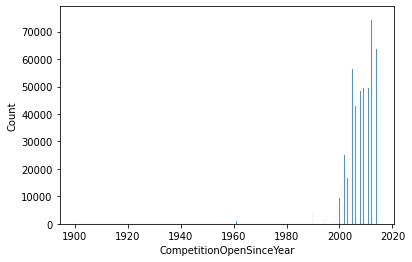

In [135]:
sns.histplot(copy_of_data.CompetitionOpenSinceYear.dropna())

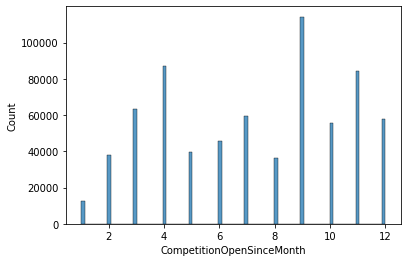

In [136]:
sns.histplot(copy_of_data.CompetitionOpenSinceMonth.dropna())

In [137]:
print(copy_of_data[['CompetitionDistance', 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear']].isnull().sum())

# Assumptions check
print('--'*50)
print('Assumption Check')
df = (copy_of_data[(copy_of_data['CompetitionDistance'].isnull())][['CompetitionDistance', 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear']])
df

CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check


,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear


In [138]:
copy_of_data['CompetitionOpenSinceMonth'] = copy_of_data['CompetitionOpenSinceMonth'].fillna(int(copy_of_data['CompetitionOpenSinceMonth'].mode()))
copy_of_data['CompetitionOpenSinceYear'] = copy_of_data['CompetitionOpenSinceYear'].fillna(int(copy_of_data['CompetitionOpenSinceYear'].mode()))
print('CompetitionDistance Missing After:') 
print(copy_of_data['CompetitionOpenSinceMonth'].isnull().sum())
print(copy_of_data['CompetitionOpenSinceYear'].isnull().sum())


CompetitionDistance Missing After:
0
0


In [139]:
copy_of_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#other

In [ ]:
# Let's start thinking about the first dataframe given i.e. stote-sales data
store_data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-02-20,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
store_data.shape

(1017209, 9)

So in this Dataset we have 1017209 observations and 9 features.Lets dive deep in each features for more insightes.

##Feature "Store"

In [ ]:
store_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
store_data['Store'].value_counts(sort=False)

512     758
1024    942
1       942
513     942
1025    942
       ... 
1021    942
510     942
1022    942
511     942
1023    942
Name: Store, Length: 1115, dtype: int64

**Store -->** Store column cotains a unique id for individual store. Here it can be observed that all 1017209 entries only we have 1115 distinct store data and each store has huge no. of repeated entries. So we have to look other features for more justification on that, why huge no. of repeated entries.

## Feature "DayOfWeek"

In [ ]:
store_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

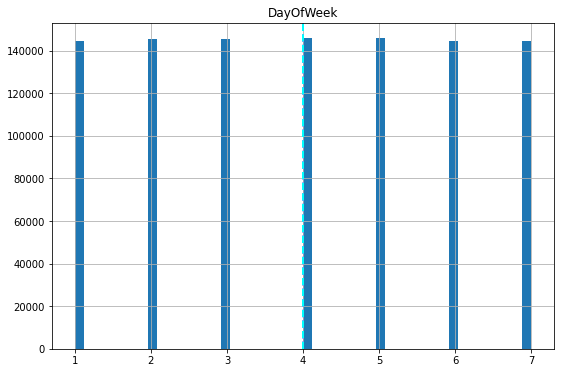

In [ ]:
# plot a bar plot for feature count
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = store_data['DayOfWeek']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('DayOfWeek')
plt.show()

**DayOfWeek -->** In this feature we have only 7 distinct values indicates 7 days in a weekand we can see the value counts are same for all 7 days, equally distributed data.

## Feature "Date"

In [ ]:
store_data['Date'].max()

'2015-07-31'

In [ ]:
store_data['Date'].min()

'2013-01-01'

**Date -->** Here if we compare the max and min alues in date we can conclude that we have data of two and half years.

## Feature "StateHoliday"

In [ ]:
store_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

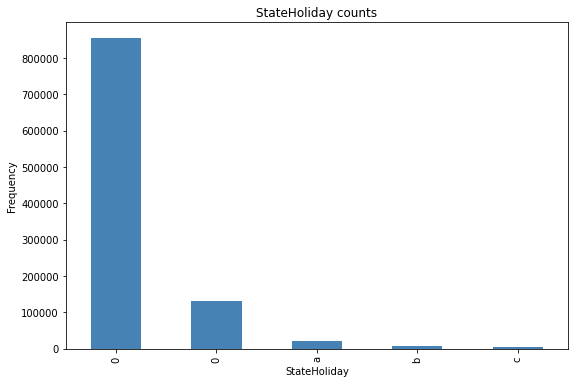

In [ ]:
# plot a bar plot for feature count
counts = store_data['StateHoliday'].value_counts().sort_values(ascending = False)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('StateHoliday' + ' counts')
ax.set_xlabel('StateHoliday') 
ax.set_ylabel("Frequency")
plt.show()

**StateHoliday -->** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

We can easily observe here that state holidays are very less in compare to the whole dataset and there are two datatypes difined for 0, so we have to fix that in later feature engineering part.


##Other remaining Features are:

**Customers -->** the number of customers on a given day.

**Open -->** an indicator for whether the store was open: 0 = closed, 1 = open.

**SchoolHoliday -->** indicates if the (Store, Date) was affected by the closure of public schools.

In [ ]:
# Let's start thinking about the first dataframe given i.e. stote-info data
store_info.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
store_info

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
